In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Sql12345!",
                          database="ecommerce")
cur=db.cursor()


 # List of all unique cities where customers are located. 

In [2]:
query=""" select distinct customer_city from customers """
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['City'])
df

,City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# Count the number of orders placed in 2017. 

In [3]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)

data=cur.fetchall()
"Total orders palced in 2017 are",data[0][0]

('Total orders palced in 2017 are', 135303)

# The total sales per category. 

In [4]:
query=""" select upper(products.product_category) category,round(sum(payments.payment_value),2) sales
            from products join order_items
            on products.product_id=order_items.product_id
            join payments
            on payments.order_id=order_items.order_id
            group by category"""
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','Sales'])
df

,Category,Sales
0,PERFUMERY,1013477.32
1,FURNITURE DECORATION,2860352.78
2,TELEPHONY,973764.10
3,BED TABLE BATH,3425107.34
4,AUTOMOTIVE,1704588.66
...,...,...
69,CDS MUSIC DVDS,2398.86
70,LA CUISINE,5827.06
71,FASHION CHILDREN'S CLOTHING,1571.34
72,PC GAMER,4348.86


# The percentage of orders that were paid in installments. 

In [5]:
query=""" select (sum(case when payment_installments>=1 then 1
            else 0 end))/count(*)*100 from payments"""
cur.execute(query)

data=cur.fetchall()
"The Percentage of Orders that were paid in Installments is ",data[0][0]

('The Percentage of Orders that were paid in Installments is ',
 Decimal('99.9981'))

# The number of customers from each state. 

<function matplotlib.pyplot.show(close=None, block=None)>

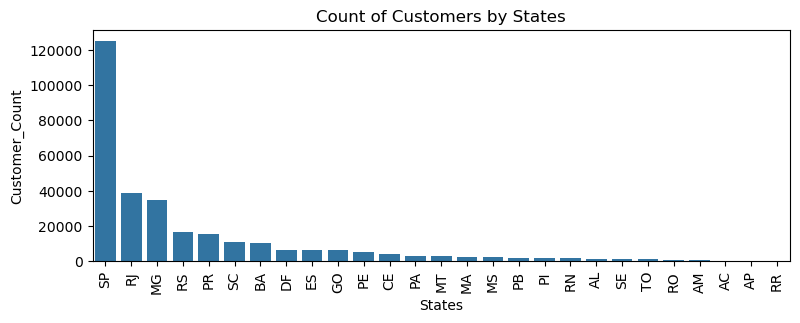

In [6]:
query=""" select customer_state,count(customer_id) 
        from customers group by customer_state"""
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['States','Customer_Count'])
df=df.sort_values(by="Customer_Count",ascending=False)
plt.figure(figsize=(9,3))
sns.barplot(x=df['States'],y=df['Customer_Count'])
plt.xticks(rotation=90)
plt.title("Count of Customers by States")
plt.show

# The number of orders per month in 2018. 

<function matplotlib.pyplot.show(close=None, block=None)>

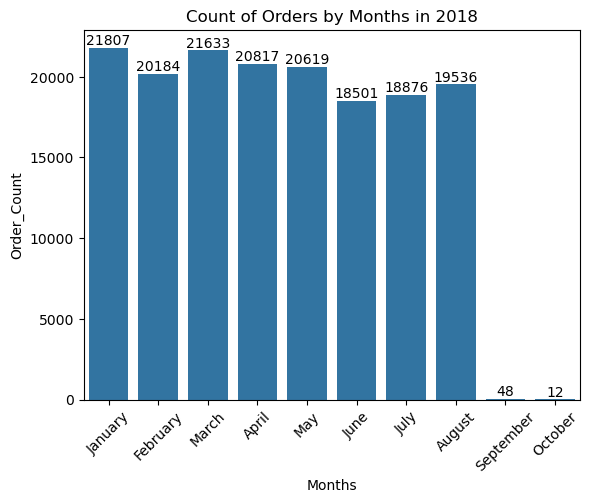

In [7]:
query="""select monthname(order_purchase_timestamp)Months,count(order_id) Order_Count
            from orders where year(order_purchase_timestamp)=2018
            group by Months """
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Months','Order_Count'])
O=['January','February','March','April','May','June','July','August','September','October']
df=df.sort_values(by="Months",ascending=False)
ax=sns.barplot(x=df['Months'],y=df['Order_Count'],order=O)
plt.xticks(rotation=45)
plt.title("Count of Orders by Months in 2018")
ax.bar_label(ax.containers[0])

plt.show

# The average number of products per order, grouped by customer city.

In [8]:
query="""with count_per_order as
        (select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
        from orders join order_items
        on orders.order_id=order_items.order_id
        group by orders.order_id,orders.customer_id)
        
        select customers.customer_city,round(avg(count_per_order.oc),2) average_orders
        from customers join count_per_order
        on customers.customer_id=count_per_order.customer_id
        group by customers.customer_city order by average_orders desc """
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Customer City','Average Products per Orders'])
df.head(20)

,Customer City,Average Products per Orders
0,padre carvalho,21.00
1,celso ramos,19.50
2,datas,18.00
3,candido godoi,18.00
4,matias olimpio,15.00
5,cidelandia,12.00
6,curralinho,12.00
7,picarra,12.00
8,morro de sao paulo,12.00
9,teixeira soares,12.00


# The percentage of total revenue contributed by each product category.

In [9]:
query="""select upper(products.product_category) category,round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) Sales_Percentage
            from products join order_items
            on products.product_id=order_items.product_id
            join payments
            on payments.order_id=order_items.order_id
            group by category order by Sales_Percentage desc"""
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','Percentage Distribution'])
df.head(10)

,Category,Percentage Distribution
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86
5,SPORT LEISURE,17.39
6,HOUSEWARES,13.68
7,AUTOMOTIVE,10.65
8,GARDEN TOOLS,10.47
9,COOL STUFF,9.74


# To Identify the correlation between product price and the number of times a product has been purchased.

In [10]:
query="""select products.product_category,
        count(order_items.product_id),
        round(avg(order_items.price),2)
        from products join order_items
        on products.product_id=order_items.product_id
        group by products.product_category"""
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','Order Count','Price'])
#df
arr1=df['Order Count']
arr2=df['Price']
a=np.corrcoef([arr1,arr2])
print("The correlation between Price and number of times a product has been purchased is :",a[0][1])

The correlation between Price and number of times a product has been purchased is : -0.10631514167157562


# The total revenue generated by each seller, and rank them by revenue. 

,Seller Id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3076
3091,702835e4b785b67a084280efca355756,18.56,3077
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3078
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3079


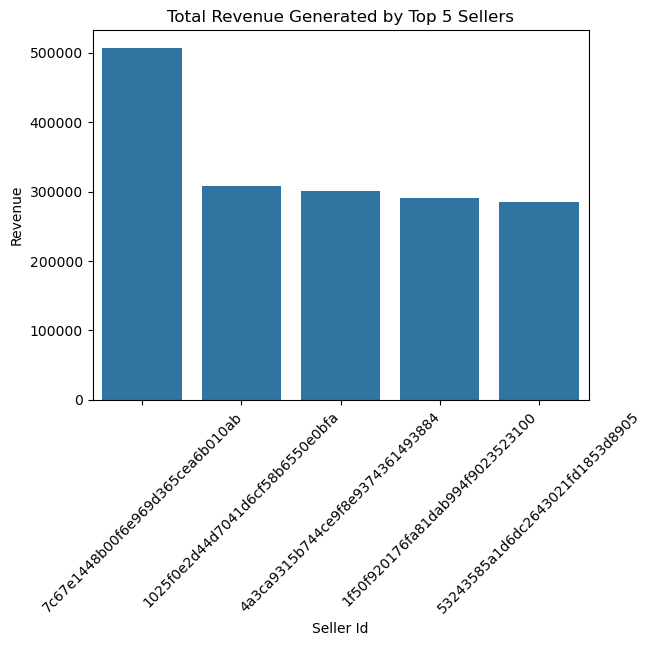

In [11]:
query="""select *,dense_rank() over(order by revenue desc)as rn from
        (select order_items.seller_id,round(sum(payments.payment_value),2) revenue
        from order_items join payments
        on order_items.order_id=payments.order_id
        group by order_items.seller_id) as a"""
cur.execute(query)

data=cur.fetchall()
#data
df=pd.DataFrame(data,columns=['Seller Id','Revenue','Rank'])
sns.barplot(x = "Seller Id",y = "Revenue",data = df.head(5))
plt.title("Total Revenue Generated by Top 5 Sellers")
plt.xticks(rotation=45)
plt.show
df

# The moving average of order values for each customer over their order history. 

In [12]:
query="""select customer_id,order_purchase_timestamp,payment,
        avg(payment) over(partition by customer_id order by order_purchase_timestamp
        rows between 2 preceding and current row) as moving_avg
        from 
        (select orders.customer_id,orders.order_purchase_timestamp,
        payments.payment_value as payment
        from payments join orders
        on payments.order_id=orders.order_id) as a"""
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Customer Id','Order Purchase Timestamp','Payment','Moving Average'])
df

,Customer Id,Order Purchase Timestamp,Payment,Moving Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
311653,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
311654,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
311655,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
311656,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# The cumulative sales per month for each year. 

<function matplotlib.pyplot.show(close=None, block=None)>

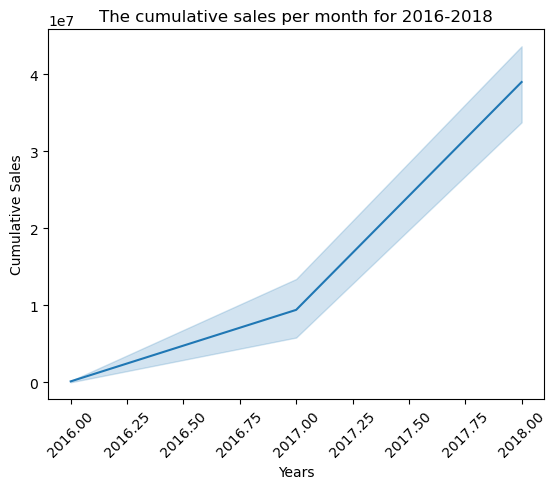

In [13]:
query="""select years,months,payment,sum(payment)
        over (order by years,months) as cumulative_sales 
        from
        (select year(orders.order_purchase_timestamp) as years,
        month(orders.order_purchase_timestamp) as months,
        round(sum(payments.payment_value),2) as payment 
        from orders join payments
        on orders.order_id=payments.order_id
        group by years,months order by years,months) as a
        """
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Years','Months','Payments','Cumulative Sales'])
sns.lineplot(x = "Years",y = "Cumulative Sales",data = df)
plt.title("The cumulative sales per month for 2016-2018")
plt.xticks(rotation=45)
plt.show
#df

# The year-over-year growth rate of total sales. 

In [14]:
query="""with a as(select year(orders.order_purchase_timestamp) as years,
        round(sum(payments.payment_value),2) as payment 
        from orders join payments
        on orders.order_id=payments.order_id
        group by years order by years)
        select years,payment,lag(payment,1) over(order by years) previous_year_sales,
        round((((payment-lag(payment,1) over(order by years))/lag(payment,1) over(order by years))*100),2) growth_rate from a
        """
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Years','Sales','Previous Year Sales','YOY Growth Rate(%)'])
df

,Years,Sales,Previous Year Sales,YOY Growth Rate(%)
0,2016,178087.02,NaN,NaN
1,2017,21749240.18,178087.02,12112.7
2,2018,26099289.16,21749240.18,20.0


# The retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase. 

In [15]:
query="""with a as(select customers.customer_id ,
        min(orders.order_purchase_timestamp) first_order
        from customers join orders
        on customers.customer_id=orders.customer_id
        group by customers.customer_id),
        b as(select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
        from a join orders
        on orders.customer_id=a.customer_id
        and orders.order_purchase_timestamp > a.first_order
        and orders.order_purchase_timestamp < 
        date_add(a.first_order,interval 6 month)
        group by a.customer_id)
        select 100*(count(distinct a.customer_id)/count(distinct b.customer_id) ) count
        from a left join b
        on a.customer_id=b.customer_id """
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Order Count'])
df


,Order Count
0,None


# The top 3 customers who spent the most money in each year. 

,Years,Customer_id,Payment,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,4270.65,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,4202.22,2
2,2016,4a06381959b6670756de02e07b83815f,3683.34,3
3,2017,1617b1357756262bfa56ab541c47bc16,40992.24,1
4,2017,c6e2731c5b391845f6800c97401a43a9,20787.93,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,20179.98,3
6,2018,ec5b2ba62e574342386871631fafd3fc,21824.64,1
7,2018,f48d464a0baaea338cb25f816991ab1f,20766.63,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,14428.32,3


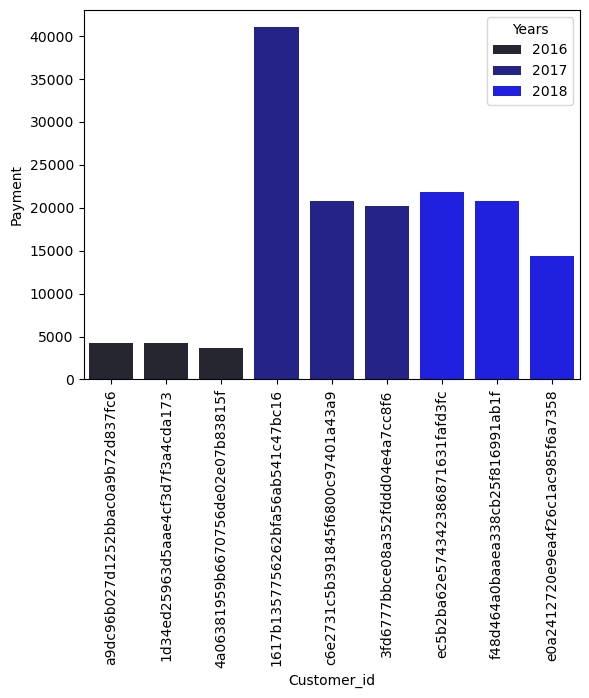

In [31]:
query="""select years,customer_id,payment,d_rank 
        from(select year(orders.order_purchase_timestamp)years,
        orders.customer_id,
        round(sum(payments.payment_value),2) payment,
        dense_rank() over(partition by year(orders.order_purchase_timestamp)
        order by sum(payments.payment_value)desc)d_rank
        from orders join payments
        on payments.order_id=orders.order_id
        group by year(orders.order_purchase_timestamp),
        orders.customer_id)as a
        where d_rank<=3"""
cur.execute(query)

data=cur.fetchall()
df=pd.DataFrame(data,columns=['Years','Customer_id','Payment','Rank'])
sns.barplot(data=df,x="Customer_id",y="Payment",hue="Years",palette="dark:blue")
plt.xticks(rotation=90)
plt.show
df